In [63]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [65]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [66]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [67]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [68]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [69]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [70]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [71]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0].split("-")
recent_date

['2017', '08', '23']

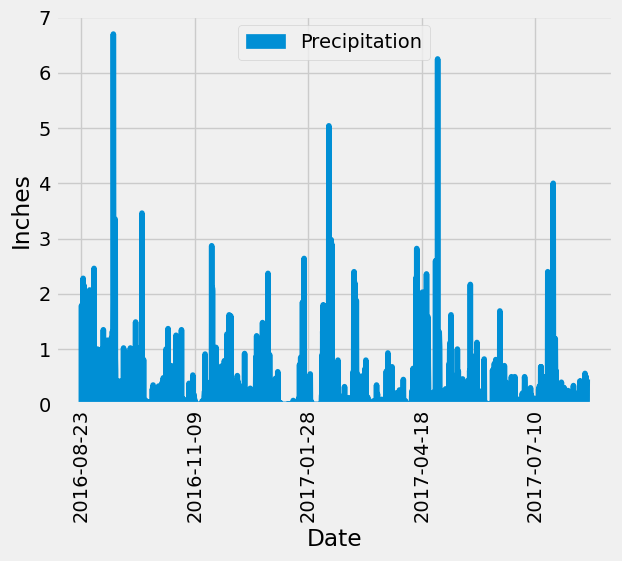

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(int(recent_date[0]), int(recent_date[1]), int(recent_date[2])) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
hawaii_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_hawaii_data = pd.DataFrame(hawaii_data, columns=["Date","Precipitation"])

# Sort the dataframe by date
df_hawaii_data.sort_values(by=['Date'],inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_hawaii_data.plot(kind='area',x="Date",y="Precipitation")
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()

In [73]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_hawaii_data['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number of stations in the dataset
len(session.query(station.station).all())

9

In [75]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == active_station[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

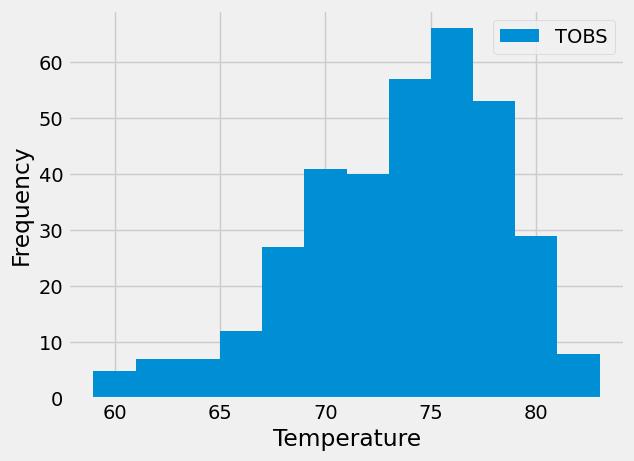

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
    filter(measurement.date >= query_date).\
    filter(measurement.station == active_station[0][0]).all()

# Save the query results as a Pandas DataFrame
df_tobs_data = pd.DataFrame(tobs_data, columns=["TOBS"])
df_tobs_data.plot(kind='hist',bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [79]:
# Close Session
session.close()